In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl


In [22]:
df = pd.read_csv('life_expectancy_data.csv')

In [23]:
df.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [24]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

In [ ]:
df.dtypes

In [ ]:
# Check for NaN values ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# Creates global variables with same name as the df variable. This is so we can call X instead of df.X 
for column in df.columns:
    globals()[column] = df[column]

In [ ]:
# Get all unique values for each column
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()
    
# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column {column}: {values}")



## To get a slightly better idea of some data trends, the following questions are proposed: 
Has life expectancy increased over time in the six nations?\
Has GDP increased over time in the six nations?\
Is there a correlation between GDP and life expectancy of a country?\
What is the average life expectancy in these nations?\
What is the distribution of that life expectancy?

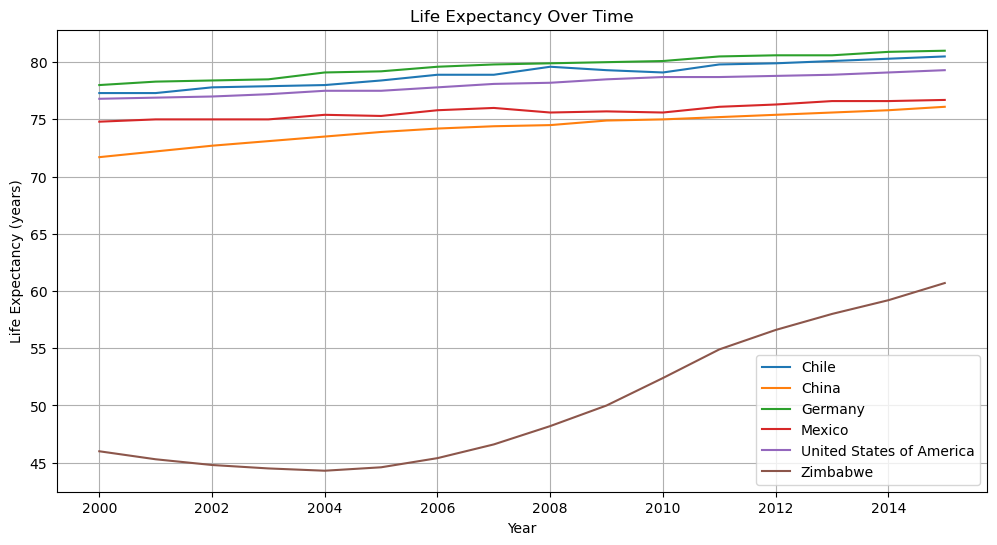

In [28]:
# Find if  life expectancy per country has increased

grouped_country = df.groupby(Country)

plt.figure(figsize=(12,6))

for country, data in grouped_country:
    plt.plot(data['Year'], data['Life expectancy at birth (years)'], label=country )

plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid(True)

plt.show()

In [44]:
# Another approach to answer this question is as follows: 

# Create two new dataframes that select all rows from the original dataframe for the years 2000 and 2015
LE_2000 = df[df['Year']==2000]
LE_2015 = df[df['Year']==2015]

# Group by Country so we can get the avg per "Country", instead of the combined average
grouped_2000 = LE_2000.groupby('Country')
grouped_2015 = LE_2015.groupby('Country')

# Calculate avg LE (Life expectancy) per year
avg_LE_2000 = grouped_2000['Life expectancy at birth (years)'].mean()
avg_LE_2015 = grouped_2015['Life expectancy at birth (years)'].mean()

LE_difference = avg_LE_2015 - avg_LE_2000 
print("Increase in Life Expectancy from 2000 to 2015:")
print(LE_difference)

# Interpretation: All numbers are positive meaning that each country did have their life expectancy incresased over time.
# Note: taking the average (avg) here is not completely necessary, since the dataset only contains one value per year per country. Thus in this case it doesn't make a difference.

Increase in Life Expectancy from 2000 to 2015:
Country
Chile                        3.2
China                        4.4
Germany                      3.0
Mexico                       1.9
United States of America     2.5
Zimbabwe                    14.7
Name: Life expectancy at birth (years), dtype: float64
